In [1]:
import os

from fptools.io import load_data
from fptools.preprocess.pipelines import lowpass_dff
from fptools.viz import collect_signals, collect_signals_2event, sig_catplot, plot_signal

In [2]:
tank_path = r'M:\Fiber Photometry master folder\C1906Y\2024-07-DLS-GRABDA2m-M\Progressive Ratio 4'

signal_map = [{
    'tdt_name': '_465A',
    'dest_name': 'Dopamine',
    'role': 'experimental'
}, {
    'tdt_name': '_415A',
    'dest_name': 'Isosbestic',
    'role': 'control'
}]

sessions = load_data(tank_path,
                     signal_map,
                     os.path.join(tank_path, 'metadata.xlsx'),
                     max_workers=4,
                     preprocess=lowpass_dff,
                     cache=True,
                     cache_dir=os.path.join(tank_path, 'cache_lowpass_dff'),
                     show_steps=True,
                     plot_dir=os.path.join(tank_path, 'cache_lowpass_dff'),
                     downsample=10)

sessions.rename_epoc('RNP_', 'RNP')
sessions.rename_epoc('RMG_', 'RMG')

Excluding block EN141_PRD1-240816-131952 due to manifest exclude flag
Excluding block EN141_PRD2-240817-140514 due to manifest exclude flag
Excluding block EN145_PRD1-240819-144327 due to manifest exclude flag
Excluding block EN145_PRD2-240820-135156 due to manifest exclude flag
Excluding block EN186_PRD1-240817-124159 due to manifest exclude flag
Excluding block ym74_PRD1-240814-114956 due to manifest exclude flag
Excluding block ym74_PRD2-240815-122106 due to manifest exclude flag


  0%|          | 0/36 [00:00<?, ?it/s]

In [3]:
for session in sessions:
    session.add_signal(collect_signals(session, 'RNP', 'Dopamine', pre=3, post=5))
    session.add_signal(collect_signals(session, 'RNP', 'Isosbestic', pre=3, post=5))

    session.add_signal(collect_signals_2event(session, 'RNP', 'RMG', 'Dopamine', pre=5, post=5, inter=5))
    session.add_signal(collect_signals_2event(session, 'RNP', 'RMG', 'Isosbestic', pre=5, post=5, inter=5))

In [4]:
sessions[0].describe()

Metadata:
    tankpath: M:\Fiber Photometry master folder\C1906Y\2024-07-DLS-GRABDA2m-M\Progressive Ratio 4
    blockname: EN140_PRD1-240813-133324
    start_date: 2024-08-13 13:33:28.999999
    utc_start_time: 13:33:28
    stop_date: 2024-08-13 14:33:28.101190
    utc_stop_time: 14:33:28
    duration: 0:59:59.101191
    stream_channel: 0
    snip_channel: 0
    mouseID: EN140
    sex: M
    genotype: HET
    sensor: GRABDA2M
    hemisphere: L
    paradigm: PR4
    paradigm_day: 1
    cable in?: True
    cube: TDT1
    drug: nan
    drug_dose: nan
    exclude: False
    notes: nan

Epocs:
    Cam1:
        num_events = (71979,)
        avg_rate = 0:00:00.077988
        earliest = 0:00:00.086999
        latest = 0:59:59.001190
    P1SC:
        num_events = (56,)
        avg_rate = 0:00:03.934781
        earliest = 0:00:01.126072
        latest = 0:55:30.440397
    UnNP:
        num_events = (751,)
        avg_rate = 0:00:10.214932
        earliest = 0:00:32.466371
        latest = 0:59

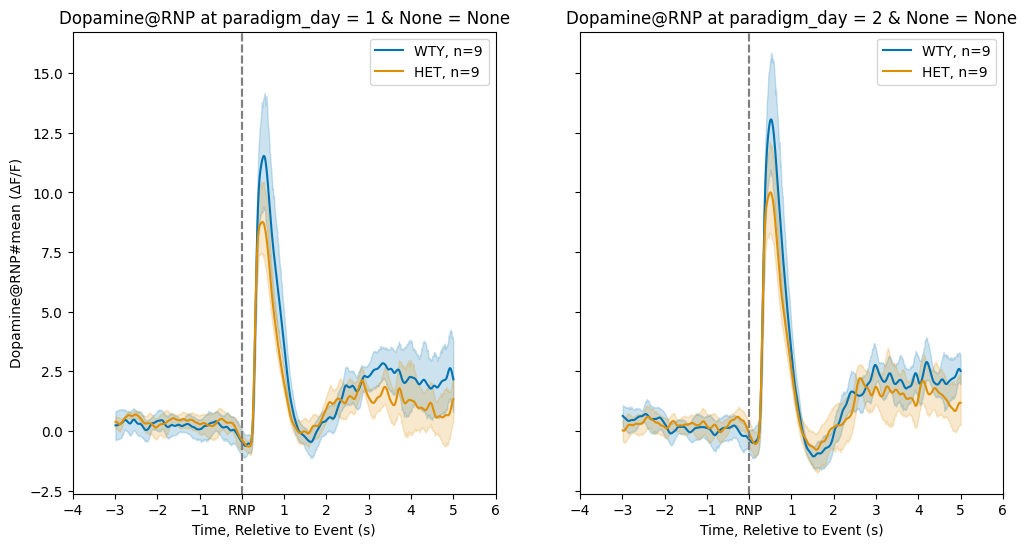

In [5]:
sig_catplot(sessions, 'Dopamine@RNP', col='paradigm_day', hue='genotype', hue_order=['WTY', 'HET'])